In [159]:
from ROOT import TEfficiency, TFile, TDirectory, TCanvas, gStyle, TGraphAsymmErrors, TLegend, EColor, TMarker
import glob
from PIL import Image
import ROOT

In [130]:
x =  ( 0.5, 1., 1.5, 2., 2.1, 2.2, 2.3, 2.4, 2.5, 2.7, 2.8, 2.9, 3., 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4., 4.5, 5., 5.5, 6., 6.5, 7.)
#vcol = (EColor.kRed-9, EColor.kRed-4, EColor.kRed, EColor.kRed+2, EColor.kYellow -3, EColor.kYellow, EColor.kGreen, EColor.kGreen+1, EColor.kGreen+2, EColor.kAzure-4, EColor.kAzure+1, EColor.kAzure, EColor.kMagenta, EColor.kMagenta +1)
vcol = (EColor.kRed-9, EColor.kRed-4, EColor.kRed, EColor.kRed+2, EColor.kYellow -3, EColor.kYellow, EColor.kGreen, EColor.kGreen+1, EColor.kGreen+2, EColor.kAzure-4, EColor.kAzure+1, EColor.kAzure, EColor.kMagenta, EColor.kMagenta +1)
def getCol(i, j =2) :
    return vcol[i]
def getcolor(i, j =2) :
    return  99 - (i * 2)
def getcolorOne(i, j) :
    if ( i != j ) :
        return 17
    else :
        return 99 - ( i *2)

In [3]:
canv = TCanvas("c1", "" ,700, 600);
canv.SetGrid()
canv_tmp = TCanvas("ctmp", "" ,700, 600);

In [160]:
gStyle.SetEndErrorSize(0)
range_up = 1.0
marker_size = 1.2
marker_style = 20
marker_style2 = 22

In [112]:
def getGif( trig, version = ver1 ) :
    frames = []
    imgs = glob.glob("Eff_%s/Spktrm/%s/*.png" % (version, trig))
    for i in imgs:
        new_frame = Image.open(i)
        frames.append(new_frame)

    # Save into a GIF file that loops forever
    frames[0].save('Eff_%s/Spktrm_%s.gif' % (version, trig), format='GIF',
                   append_images=frames[1:],
                   save_all=True,
                   duration=len(frames)*15, loop=0)

In [157]:
canv.cd();
canv.SetLogy(False)
def DrawTrigPTSeq(trigDir, canv,  _leg = 0, _header = "", _pallet = getCol, _paux = 0) :
    canv.Clear();
    canv.SetGrid()
    canv.cd();
    # leg = TLegend(0.5, 0.2, 0.8, 0.45)
    _leg.SetBorderSize(0)
    _leg.SetNColumns(3)
    _leg.SetHeader( _header )
    first = True;
    ptmp = TGraphAsymmErrors()
    for i in reversed(range(len(x))):
        hist = trigDir.Get('pt_%dp%d' % (int(x[i]), int(10 *(x[i] - int(x[i]) ))))
        canv_tmp.cd()
        hist.Draw("AP")
        canv_tmp.Update()
        if( (hist.IsA()).GetName() == "TEfficiency") :
            hist = hist.GetPaintedGraph()
        canv.cd()
        hist.SetLineColor( _pallet(i, _paux) )
        hist.SetMarkerColor( _pallet(i, _paux) )
        hist.SetMarkerSize(marker_size)
        if( (i % 2) == 0) :
            hist.SetMarkerStyle(marker_style)
        if( (i % 2) == 1) :
            hist.SetMarkerStyle(marker_style2)
        hist.GetYaxis().SetRangeUser(0,range_up)
        hist.GetYaxis().SetNdivisions(int(range_up *10))
        hist.GetXaxis().SetRangeUser(0,50)
        hist.GetXaxis().SetNdivisions(25)
        hist.GetXaxis().SetTitle("p_{T} (GeV/c)")
        hist.GetYaxis().SetTitle("Efficiency")
        hist.Draw( "APL " if first else "PL ")
        if(_paux == i) :
            ptmp = hist
        leg.AddEntry(hist, "pt > %.1f" % x[i])
        first = False
    ptmp.Draw("PL")
    leg.DrawClone()
    canv.Draw()
    return canv, leg

def DrawTrigOne(trigDir, obj, canv, _and = False, _col = 221) :
    if not ( _and ) :
        canv.Clear();
    first = True;
    hist = trigDir.Get(obj)
#    canv_tmp.cd()
#    hist.Draw()
#    canv_tmp.Update()
    if( (hist.IsA()).GetName() == "TEfficiency") :
        canv_tmp.cd()
        hist.Draw()
        canv_tmp.Update()
        hist = hist.GetPaintedGraph()
    canv.cd()
    canv.Draw()
    col = _col
    if( _and ) : col = col-1
    hist.SetLineColor(col)
    hist.SetMarkerColor(col)
    hist.SetMarkerSize(marker_size)
    hist.SetMarkerStyle(marker_style)
    hist.GetYaxis().SetRangeUser(0,range_up)
    hist.GetYaxis().SetNdivisions(int(range_up *10))
    hist.GetXaxis().SetRangeUser(0,50)
    hist.GetXaxis().SetNdivisions(25)
    hist.GetXaxis().SetTitle("p_{T} (GeV/c)")
    hist.GetYaxis().SetTitle("Efficiency")
    if( _and ) :
        print("and")
        hist.Draw( "PE" )
    else : 
        hist.Draw( "APE" )
    
    canv.Draw()
    return canv

def DrawTrigSeq(trigDir, obj, canv, _and = False, _col = 221, _leg = 0, _marker = 1, _disc = "") :
    if not ( _and ) :
        canv.Clear();
    first = True;
    hist = trigDir.Get(obj)
    if( (hist.IsA()).GetName() == "TEfficiency") :
        canv_tmp.cd()
        hist.Draw()
        canv_tmp.Update()
        hist = hist.GetPaintedGraph()
    canv.cd()
    canv.Draw()
    col = _col
    if( _and ) : col = col-1
    hist.SetLineColor(col)
    hist.SetMarkerColor(col)
    hist.SetMarkerSize(marker_size)
    hist.SetMarkerStyle(_marker)
    hist.GetYaxis().SetRangeUser(0,range_up)
    hist.GetYaxis().SetNdivisions(int(range_up *10))
    hist.GetXaxis().SetRangeUser(0,50)
    hist.GetXaxis().SetNdivisions(25)
    hist.GetXaxis().SetTitle("p_{T} (GeV/c)")
    hist.GetYaxis().SetTitle("Efficiency")

    if( _leg != 0 ) :
        leg.AddEntry(hist, _disc)
    if( _and ) :
        hist.Draw( "PEL" )
    else : 
        hist.Draw( "APEL" )

    canv.Draw()
    if ( _leg == 0) :
        return canv, 0
    else :
        return canv, leg

In [178]:
# f_out = TFile.Open("output_Data2018_newMenu.root")
# f_out = TFile.Open("output_Data2018_newMenudRCut0p3.root")
f_out1 = TFile.Open("output_Data2018_v2_6.root")
# f_out2 = TFile.Open("output_Data2018_v2_7_mod1.root")
# f_out2 = TFile.Open("output_JPsiEMB_v2_9.root")
#f_out2 = TFile.Open("output_JPsiEMB_v2_9_test3.root")

# f_out2 = TFile.Open("output_pTHat2_JPsiEMB_v2_11.root")
# ver1 = "v2_11"
# pltdir = "Eff_%s" % ver1
# ver = "JPsiEMB_pTHatMin2" + ver1

f_out2 = TFile.Open("output_UpsiEMB_v2_11.root")
ver1 = "v2_11"
pltdir = "Eff_%s" % ver1
ver = "UpsiEMB" + ver1

In [7]:
f_leg = TFile.Open("output_Data2018_LegacydR0p3.root")

In [8]:
leg = TLegend(0.15,0.12,0.45,0.35)
leg.SetBorderSize(0)

In [ ]:


leg.SetNColumns(1)
leg.SetTextSize(0.024)
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35);
leg.Clear()
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuOpen"), 'pt', canv, _col = 221, _leg = leg, _disc = "L1DoubleMuOpen v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuZero"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "L1DoubleMuZero v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuSQ"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "L1DoubleMu SQ v2-6")

canv, leg = DrawTrigSeq(f_out2.Get("L1DoubleMuOpen"), 'pt', canv, _and = False, _col = 216, _leg = leg, _disc = "L1DoubleMuOpen %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L1DoubleMuZero"), 'pt', canv, _and = True, _col = 211, _leg = leg, _disc = "L1DoubleMuZero %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L1DoubleMuSQ"), 'pt', canv, _and = True, _col = 95, _leg = leg, _disc = "L1DoubleMu SQ %s" % ver1)# v2-7-mod1")

# canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL1DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL1DoubleMu0_Legacy_v")
leg.DrawClone()
canv.Draw()
canv.SaveAs("%s/Eff_pt_L1DoubleMuOpen_Comp_%s.pdf" % (pltdir, ver) )
leg.Clear()

# canv, leg = DrawTrigSeq(f_out1.Get("L2DoubleMuOpen"), 'pt', canv, _col = 221, _leg = leg, _disc = "L2DoubleMuOpen v2-6")
# canv, leg = DrawTrigSeq(f_out1.Get("L2DoubleMuZero"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "L2DoubleMuZero v2-6")
# canv, leg = DrawTrigSeq(f_out1.Get("L2DoubleMuSQ"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "L2DoubleMu SQ v2-6")

canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen"), 'pt', canv, _and = False, _col = 216, _leg = leg, _disc = "L2DoubleMuOpen %s" % ver1)
canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuZero"), 'pt', canv, _and = True, _col = 211, _leg = leg, _disc = "L2DoubleMuZero %s" % ver1)
canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuSQ"), 'pt', canv, _and = True, _col = 95, _leg = leg, _disc = "L2DoubleMu SQ %s" % ver1)

# canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL2DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL2DoubleMu0_Legacy_v")
leg.SetX1(0.17)
leg.SetNColumns(2)
leg.DrawClone()
canv.Draw()
canv.SaveAs("%s/Eff_pt_L2DoubleMuOpen_Comp_%s.pdf" % (pltdir, ver) )
leg.Clear()

# canv, leg = DrawTrigSeq(f_out1.Get("L3DoubleMuOpen"), 'pt', canv, _col = 221, _leg = leg, _disc = "L3DoubleMuOpen v2-6")
# canv, leg = DrawTrigSeq(f_out1.Get("L3DoubleMuZero"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "L3DoubleMuZero v2-6")
# canv, leg = DrawTrigSeq(f_out1.Get("L3DoubleMuSQ"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "L3DoubleMu SQ v2-6")

canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen"), 'pt', canv, _and = False, _col = 216, _leg = leg, _disc = "dR <0.1 L3DoubleMuOpen %s" % ver1)
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuZero"), 'pt', canv, _and = True, _col = 211, _leg = leg, _disc = "dR <0.1 L3DoubleMuZero %s" % ver1)
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuSQ"), 'pt', canv, _and = True, _col = 95, _leg = leg, _disc = "dR <0.1 L3DoubleMu SQ %s" % ver1)
canv, leg = DrawTrigSeq(f_out3.Get("L3DoubleMuOpen"), 'pt', canv, _and = True, _col = 219, _leg = leg, _disc = "dR <0.3 L3DoubleMuOpen %s" % ver1)
# canv, leg = DrawTrigSeq(f_out3.Get("L3DoubleMuZero"), 'pt', canv, _and = True, _col = 215, _leg = leg, _disc = "dR <0.3 L3DoubleMuZero %s" % ver1)
# canv, leg = DrawTrigSeq(f_out3.Get("L3DoubleMuSQ"), 'pt', canv, _and = True, _col = 98, _leg = leg, _disc = "dR <0.3 L3DoubleMu SQ %s" % ver1)

#canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL3DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL3DoubleMu0_Legacy_v")
leg.SetX1(0.52);leg.SetX2(0.82);leg.SetY1(0.12);leg.SetY2(0.39);
leg.SetNColumns(1)
leg.DrawClone()
leg.Clear()
canv.Draw()
canv.SaveAs("%s/Eff_pt_L3DoubleMuOpen_Comp_%s.pdf" % (pltdir, ver) )

canv, leg = DrawTrigSeq(f_out2.Get("L1DoubleMuOpen_drMax3p5M0to7_Open"), 'pt_3p5', canv, _and = False, _col = 216, _leg = leg, _disc = "L1DoubleMu Open Mass 0 to 7 GeV %s" % ver1)
canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen_drMax3p5_M0to7_Open"), 'pt_3p5', canv, _and = True, _col = 211, _leg = leg, _disc = "L2DoubleMu Open Mass 0 to 7 GeV %s" % ver1)
canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_drMax3p5_M0to7_Open"), 'pt_3p5', canv, _and = True, _col = 95, _leg = leg, _disc = "L3DoubleMu Open Mass 0 to 7 GeV %s" % ver1)

#canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL3DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL3DoubleMu0_Legacy_v")
leg.SetX1(0.68);leg.SetX2(0.82);leg.SetY1(0.12);leg.SetY2(0.39);
leg.SetNColumns(1)
leg.DrawClone()
leg.Clear()
canv.Draw()
canv.SaveAs("%s/Eff_pt_DoubleMuOpenMass_Comp_%s.pdf" % (pltdir, ver) )

# canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen_drMax3p5_M0to7_Open"), 'pt', canv, _and = False, _col = 216, _leg = leg, _disc = "L1DoubleMu Open Mass 0 to 7 GeV %s" % ver1)
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_drMax3p5_M0to7_Open"), 'pt_2p5', canv, _and = False, _col = 211, _leg = leg, _disc = "L2DoubleMu Open Mass 0 to 7 GeV %s" % ver1)
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_drMax3p5_M0to7_Open"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "L2DoubleMu Open Mass 0 to 7 GeV %s" % ver1)

# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_drMax3p5_M0to7_Open"), 'pt_2p5', canv, _and = False, _col = 211, _leg = leg, _disc = "L2DoubleMu Open Mass 0 to 7 GeV %s" % ver1)

canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen"), 'pt_2p5', canv, _and = False, _col = 216, _leg = leg, _disc = "L2DoubleMu Open pT cut Mass 0 to 7 GeV %s" % ver1)
canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen"), 'pt', canv, _and = True, _col = 218, _leg = leg, _disc = "L2DoubleMu Open Mass 0 to 7 GeV %s" % ver1)
canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuZero"), 'pt', canv, _and = True, _col = 216, _leg = leg, _disc = "L2DoubleMu Zero Mass 0 to 7 GeV %s" % ver1)
canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuSQ"), 'pt', canv, _and = True, _col = 211, _leg = leg, _disc = "L2DoubleMu SQ Mass 0 to 7 GeV %s" % ver1)
leg.DrawClone()
canv.Draw()


Info in <TCanvas::Print>: pdf file Eff_v2_11/Eff_pt_RateCut_Comp_UpsiEMBv2_11.pdf has been created


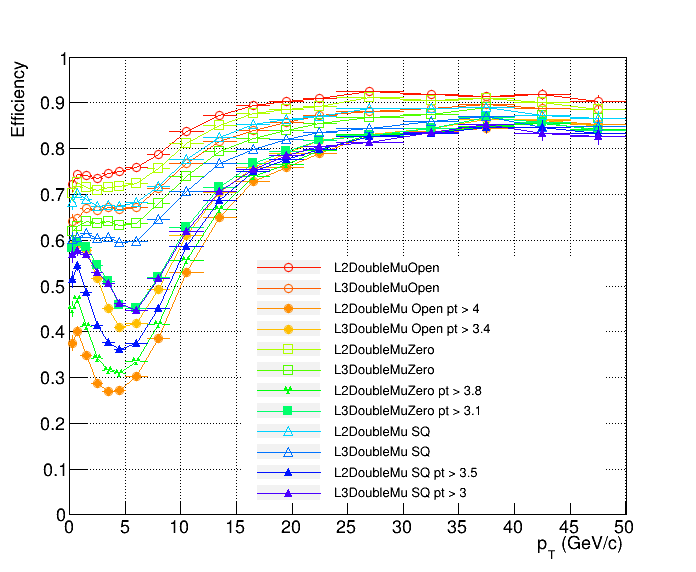

In [179]:

leg.SetNColumns(1)
leg.SetTextSize(0.024)
leg.SetX1(0.35);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.55);
leg.Clear()
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuOpen"), 'pt', canv, _col = 221, _leg = leg, _disc = "L1DoubleMuOpen v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuZero"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "L1DoubleMuZero v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuSQ"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "L1DoubleMu SQ v2-6")

canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen"), 'pt', canv, _and = False, _col = getcolor(0), _leg = leg, _marker = 24, _disc = "L2DoubleMuOpen")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen"), 'pt', canv, _and = True, _col = getcolor(1), _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen"), 'pt_4p0', canv, _and = True, _col = getcolor(2), _leg = leg, _marker = 20, _disc = "L2DoubleMu Open pt > 4")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen"), 'pt_3p4', canv, _and = True, _col = getcolor(3), _leg = leg, _marker = 20, _disc = "L3DoubleMu Open pt > 3.4")# %s" % ver1)# v2-7-mod1")

canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuZero"), 'pt', canv, _and = True, _col = getcolor(6), _leg = leg, _marker = 25, _disc = "L2DoubleMuZero")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuZero"), 'pt', canv, _and = True, _col = getcolor(8), _leg = leg, _marker = 25, _disc = "L3DoubleMuZero")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuZero"), 'pt_3p8', canv, _and = True, _col = getcolor(10), _leg = leg, _marker = 39,  _disc = "L2DoubleMuZero pt > 3.8")#%s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuZero"), 'pt_3p1', canv, _and = True, _col = getcolor(12), _leg = leg, _marker = 21, _disc = "L3DoubleMuZero pt > 3.1")#%s" % ver1)# v2-7-mod1")

canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuSQ"), 'pt', canv, _and = True, _col = getcolor(16), _leg = leg, _marker = 26, _disc = "L2DoubleMu SQ")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuSQ"), 'pt', canv, _and = True, _col = getcolor(18), _leg = leg, _marker = 26, _disc = "L3DoubleMu SQ")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuSQ"), 'pt_3p5', canv, _and = True, _col = getcolor(20), _leg = leg, _marker = 22, _disc = "L2DoubleMu SQ pt > 3.5")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuSQ"), 'pt_3p0', canv, _and = True, _col = getcolor(22), _leg = leg, _marker = 22, _disc = "L3DoubleMu SQ pt > 3")# %s" % ver1)# v2-7-mod1")

# canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL1DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL1DoubleMu0_Legacy_v")
leg.DrawClone()
canv.Draw()
canv.SaveAs("%s/Eff_pt_RateCut_Comp_%s.pdf" % (pltdir, ver) )
leg.Clear()

Info in <TCanvas::Print>: pdf file Eff_v2_11/Eff_pt_RateCut_Comp2_JPsiEMB_pTHatMin2v2_11.pdf has been created


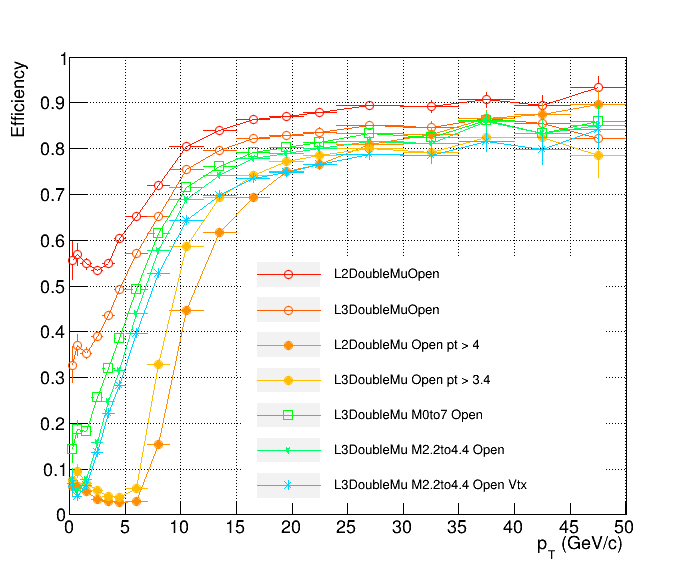

In [173]:

leg.SetNColumns(1)
leg.SetTextSize(0.024)
leg.SetX1(0.35);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.55);
leg.Clear()
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuOpen"), 'pt', canv, _col = 221, _leg = leg, _disc = "L1DoubleMuOpen v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuZero"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "L1DoubleMuZero v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuSQ"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "L1DoubleMu SQ v2-6")

canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen"), 'pt', canv, _and = False, _col = getcolor(0), _leg = leg, _marker = 24, _disc = "L2DoubleMuOpen")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen"), 'pt', canv, _and = True, _col = getcolor(1), _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen"), 'pt_4p0', canv, _and = True, _col = getcolor(2), _leg = leg, _marker = 20, _disc = "L2DoubleMu Open pt > 4")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen"), 'pt_3p4', canv, _and = True, _col = getcolor(3), _leg = leg, _marker = 20, _disc = "L3DoubleMu Open pt > 3.4")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_drMax3p5_M0to7_Open"), 'pt', canv, _and = True, _col = getcolor(10), _leg = leg, _marker = 25, _disc = "L3DoubleMu M0to7 Open")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_drMax3p5_M2p2to4p4_Open"), 'pt', canv, _and = True, _col = getcolor(12), _leg = leg, _marker = 29, _disc = "L3DoubleMu M2.2to4.4 Open")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_drMax3p5_M2p2to4p4_Open_Vtx"), 'pt', canv, _and = True, _col = getcolor(16), _leg = leg, _marker = 31, _disc = "L3DoubleMu M2.2to4.4 Open Vtx")# %s" % ver1)# v2-7-mod1")


# canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuZero"), 'pt', canv, _and = True, _col = getcolor(6), _leg = leg, _marker = 25, _disc = "L2DoubleMuZero")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuZero"), 'pt', canv, _and = True, _col = getcolor(8), _leg = leg, _marker = 25, _disc = "L3DoubleMuZero")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuZero"), 'pt_3p8', canv, _and = True, _col = getcolor(10), _leg = leg, _marker = 39,  _disc = "L2DoubleMuZero pt > 3.8")#%s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuZero"), 'pt_3p1', canv, _and = True, _col = getcolor(12), _leg = leg, _marker = 21, _disc = "L3DoubleMuZero pt > 3.1")#%s" % ver1)# v2-7-mod1")

# canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuSQ"), 'pt', canv, _and = True, _col = getcolor(16), _leg = leg, _marker = 26, _disc = "L2DoubleMu SQ")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuSQ"), 'pt', canv, _and = True, _col = getcolor(18), _leg = leg, _marker = 26, _disc = "L3DoubleMu SQ")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuSQ"), 'pt_3p5', canv, _and = True, _col = getcolor(20), _leg = leg, _marker = 22, _disc = "L2DoubleMu SQ pt > 3.5")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuSQ"), 'pt_3p0', canv, _and = True, _col = getcolor(22), _leg = leg, _marker = 22, _disc = "L3DoubleMu SQ pt > 3")# %s" % ver1)# v2-7-mod1")

# canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL1DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL1DoubleMu0_Legacy_v")
leg.DrawClone()
canv.Draw()
canv.SaveAs("%s/Eff_pt_RateCut_Comp2_%s.pdf" % (pltdir, ver) )
leg.Clear()

Info in <TCanvas::Print>: pdf file Eff_v2_11/Eff_pTSpectrum_L2DoubleMuOpen.pdf has been created
Info in <TCanvas::Print>: pdf file Eff_v2_11/Eff_pTSpectrum_L2DoubleMuZero.pdf has been created
Info in <TCanvas::Print>: pdf file Eff_v2_11/Eff_pTSpectrum_L2DoubleMuSQ.pdf has been created
Info in <TCanvas::Print>: pdf file Eff_v2_11/Eff_pTSpectrum_L3DoubleMuOpen.pdf has been created
Info in <TCanvas::Print>: pdf file Eff_v2_11/Eff_pTSpectrum_L3DoubleMuOpen_drMax3p5_M0to7_Open.pdf has been created
Info in <TCanvas::Print>: pdf file Eff_v2_11/Eff_pTSpectrum_L3DoubleMuZero.pdf has been created
Info in <TCanvas::Print>: pdf file Eff_v2_11/Eff_pTSpectrum_L3DoubleMuSQ.pdf has been created


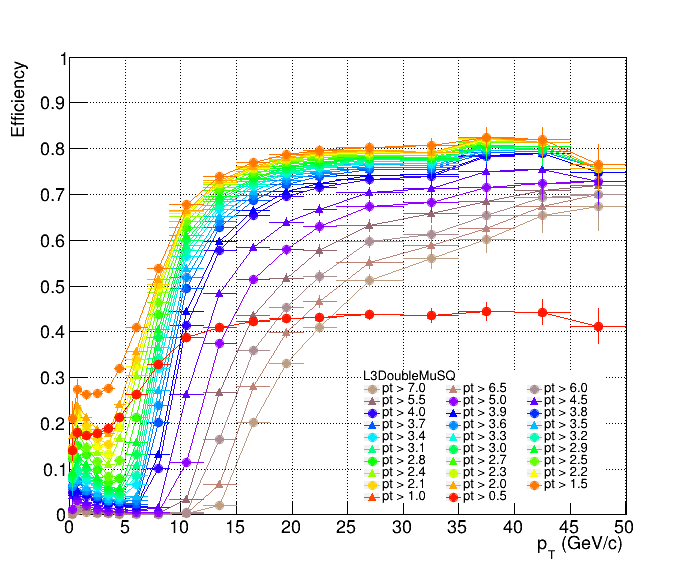

In [174]:
leg.Clear()
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L2DoubleMuOpen"
canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolor)
canv.SaveAs("Eff_%s/Eff_pTSpectrum_%s.pdf" % (ver1, tg) )

leg.Clear()
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L2DoubleMuZero"
canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolor)
canv.SaveAs("Eff_%s/Eff_pTSpectrum_%s.pdf" % (ver1, tg) )

leg.Clear()
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L2DoubleMuSQ"
canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolor)
canv.SaveAs("Eff_%s/Eff_pTSpectrum_%s.pdf" % (ver1, tg) )

leg.Clear()
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L3DoubleMuOpen"
canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolor)
canv.SaveAs("Eff_%s/Eff_pTSpectrum_%s.pdf" % (ver1, tg) )

leg.Clear()
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L3DoubleMuOpen_drMax3p5_M0to7_Open"
canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolor)
canv.SaveAs("Eff_%s/Eff_pTSpectrum_%s.pdf" % (ver1, tg) )

leg.Clear()
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L3DoubleMuZero"
canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolor)
canv.SaveAs("Eff_%s/Eff_pTSpectrum_%s.pdf" % (ver1, tg) )

leg.Clear()
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L3DoubleMuSQ"
canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolor)
canv.SaveAs("Eff_%s/Eff_pTSpectrum_%s.pdf" % (ver1, tg) )


IndexError: list index out of range

python ERROR: cannot open image file "Eff_v2_11/Spktrm/L2DoubleMuZero/Eff_pTSpectrum_0_L2DoubleMuZero.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file Eff_v2_11/Spktrm/L2DoubleMuZero/Eff_pTSpectrum_0_L2DoubleMuZero.png
python ERROR: cannot open image file "Eff_v2_11/Spktrm/L2DoubleMuZero/Eff_pTSpectrum_1_L2DoubleMuZero.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file Eff_v2_11/Spktrm/L2DoubleMuZero/Eff_pTSpectrum_1_L2DoubleMuZero.png
python ERROR: cannot open image file "Eff_v2_11/Spktrm/L2DoubleMuZero/Eff_pTSpectrum_2_L2DoubleMuZero.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file Eff_v2_11/Spktrm/L2DoubleMuZero/Eff_pTSpectrum_2_L2DoubleMuZero.png
python ERROR: cannot open image file "Eff_v2_11/Spktrm/L2DoubleMuZero/Eff_pTSpectrum_3_L2DoubleMuZero.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file Eff_

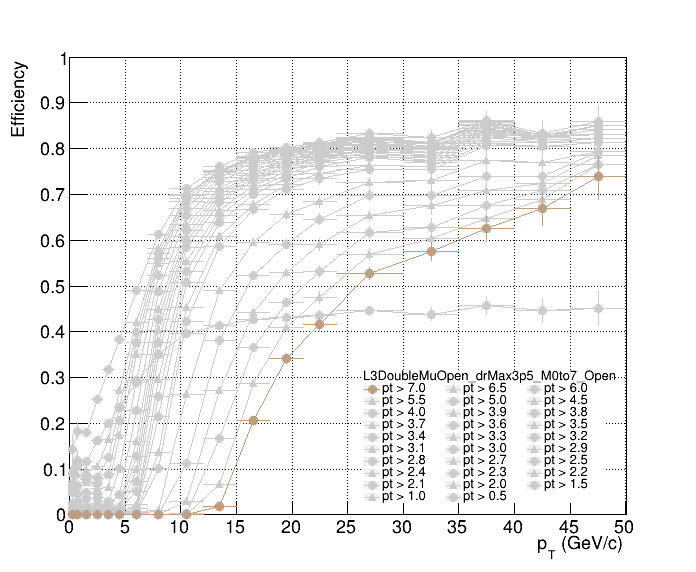

In [175]:
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L2DoubleMuZero"
ROOT.gSystem.mkdir("Eff_%s/Spktrm/%s" % (ver1, tg) )
for ix in range (len(x)):
    leg.Clear()
    canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolorOne, _paux = ix)
    canv.SaveAs("Eff_%s/Spktrm/%s/Eff_pTSpectrum_%d_%s.png" % (ver1, tg, ix, tg) )
getGif(tg)

leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L2DoubleMuOpen"
ROOT.gSystem.mkdir("Eff_%s/Spktrm/%s" % (ver1, tg) )
for ix in range (len(x)):
    leg.Clear()
    canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolorOne, _paux = ix)
    canv.SaveAs("Eff_%s/Spktrm/%s/Eff_pTSpectrum_%d_%s.png" % (ver1, tg, ix, tg) )
getGif(tg)
    
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L2DoubleMuSQ"
ROOT.gSystem.mkdir("Eff_%s/Spktrm/%s" % (ver1, tg) )
for ix in range (len(x)):
    leg.Clear()
    canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolorOne, _paux = ix)
    canv.SaveAs("Eff_%s/Spktrm/%s/Eff_pTSpectrum_%d_%s.png" % (ver1, tg, ix, tg) )
getGif(tg)


leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L3DoubleMuZero"
ROOT.gSystem.mkdir("Eff_%s/Spktrm/%s" % (ver1, tg) )
for ix in range (len(x)):
    leg.Clear()
    canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolorOne, _paux = ix)
    canv.SaveAs("Eff_%s/Spktrm/%s/Eff_pTSpectrum_%d_%s.png" % (ver1, tg, ix, tg) )
getGif(tg)

leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L3DoubleMuOpen"
ROOT.gSystem.mkdir("Eff_%s/Spktrm/%s" % (ver1, tg) )
for ix in range (len(x)):
    leg.Clear()
    canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolorOne, _paux = ix)
    canv.SaveAs("Eff_%s/Spktrm/%s/Eff_pTSpectrum_%d_%s.png" % (ver1, tg, ix, tg) )
getGif(tg)

leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L3DoubleMuOpen_drMax3p5_M0to7_Open"
ROOT.gSystem.mkdir("Eff_%s/Spktrm/%s" % (ver1, tg) )
for ix in range (len(x)):
    leg.Clear()
    canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolorOne, _paux = ix)
    canv.SaveAs("Eff_%s/Spktrm/%s/Eff_pTSpectrum_%d_%s.png" % (ver1, tg, ix, tg) )
getGif(tg)

leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L3DoubleMuOpen_drMax3p5_M2p2to4p4_Open"
ROOT.gSystem.mkdir("Eff_%s/Spktrm/%s" % (ver1, tg) )
for ix in range (len(x)):
    leg.Clear()
    canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolorOne, _paux = ix)
    canv.SaveAs("Eff_%s/Spktrm/%s/Eff_pTSpectrum_%d_%s.png" % (ver1, tg, ix, tg) )
getGif(tg)
    
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L3DoubleMuSQ"
ROOT.gSystem.mkdir("Eff_%s/Spktrm/%s" % (ver1, tg) )
for ix in range (len(x)):
    leg.Clear()
    canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolorOne, _paux = ix)
    canv.SaveAs("Eff_%s/Spktrm/%s/Eff_pTSpectrum_%d_%s.png" % (ver1, tg, ix, tg) )
getGif(tg)

Info in <TCanvas::Print>: pdf file Eff_pt_L3DoubleMuOpen_Comp_MassCut_v2_7_mod1.pdf has been created


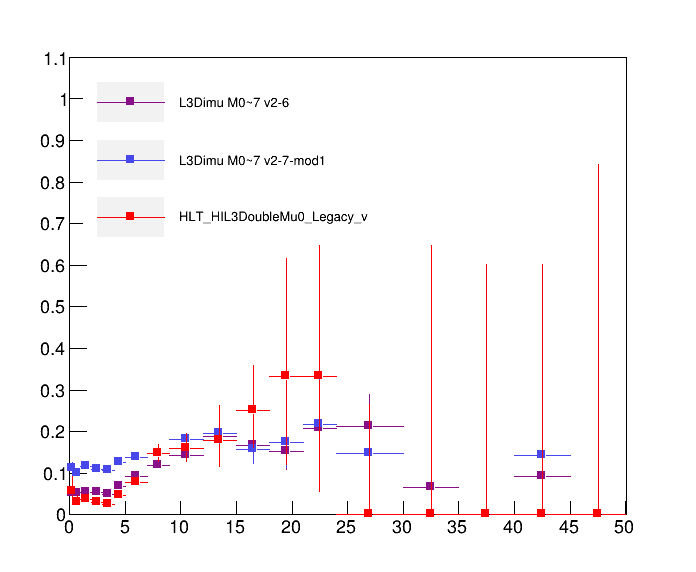

In [58]:
leg.SetNColumns(1)
canv, leg = DrawTrigSeq(f_out1.Get("L3DoubleMuOpen_drMax3p5_M0to7_Open"), 'pt', canv, _col = 221, _leg = leg, _disc = "L3Dimu M0~7 v2-6")

canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_drMax3p5_M0to7_Open"), 'pt', canv, _and = True, _col = 216, _leg = leg, _disc = "L3Dimu M0~7 v2-7-mod1")

canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL3DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 3, _leg = leg, _disc = "HLT_HIL3DoubleMu0_Legacy_v")
leg.SetY1(0.57);leg.SetY2(0.87);
leg.DrawClone()
leg.Clear()
canv.Draw()
canv.SaveAs("Eff_pt_L3DoubleMuOpen_Comp_MassCut_%s.pdf" % ver)

Info in <TCanvas::Print>: pdf file Eff_pt_L3DoubleMuOpen_Comp_MassCut_v2_7_mod1.pdf has been created


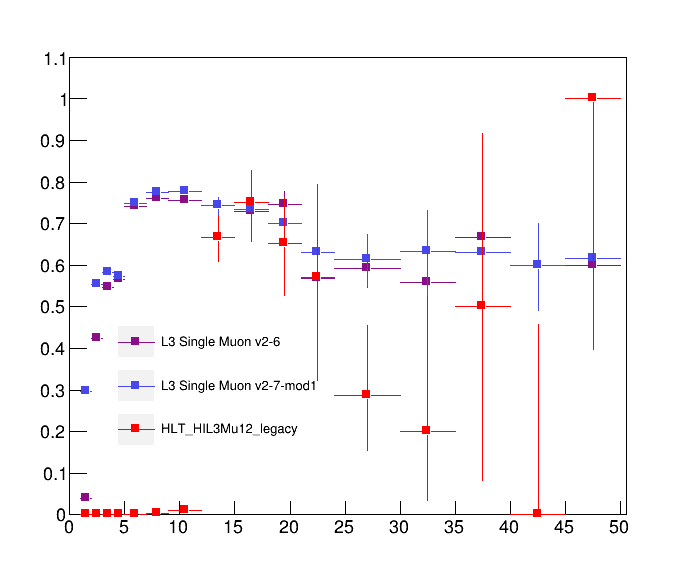

In [59]:
leg.SetNColumns(1)
canv, leg = DrawTrigSeq(f_out1.Get("HLT_HIL3Mu0_v"), 'pt', canv, _col = 221, _leg = leg, _disc = "L3 Single Muon v2-6")

canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3Mu0_v"), 'pt', canv, _and = True, _col = 216, _leg = leg, _disc = "L3 Single Muon v2-7-mod1")

canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL3Mu12_v"), 'pt', canv, _and = True, _col = 3, _leg = leg, _disc = "HLT_HIL3Mu12_legacy")
leg.SetY1(0.21);leg.SetY2(0.44);
leg.SetX1(0.16);leg.SetX2(0.45);

leg.DrawClone()
leg.Clear()
canv.Draw()
canv.SaveAs("Eff_pt_L3DoubleMuOpen_Comp_MassCut_%s.pdf" % ver)

In [18]:
if f_out1.IsOpen()  : f_out1.Close()
if f_out2.IsOpen()  : f_out2.Close()
f_out1 = TFile.Open("output_Data2018_v2_6.root")
f_out2 = TFile.Open("output_Data2018_v2_7_mod1.root")

In [ ]:
ver = "v2_7_mod1"
pltdir = "Eff_JPsiHydjet_v220530"
leg.SetNColumns(1)
leg.SetTextSize(0.024)
leg.SetX1(0.12);leg.SetX2(0.67);leg.SetY1(0.12);leg.SetY2(0.35);
leg.Clear()
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuOpen"), 'pt', canv, _col = 221, _leg = leg, _disc = "L1DoubleMuOpen v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuZero"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "L1DoubleMuZero v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuSQ"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "L1DoubleMu SQ v2-6")

canv, leg = DrawTrigSeq(f_out2.Get("L1DoubleMuOpen"), 'pt', canv, _and = False, _col = 216, _leg = leg, _disc = "L1DoubleMuOpen new")# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L1DoubleMuZero"), 'pt', canv, _and = True, _col = 211, _leg = leg, _disc = "L1DoubleMuZero new")# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L1DoubleMuSQ"), 'pt', canv, _and = True, _col = 95, _leg = leg, _disc = "L1DoubleMu SQ")# v2-7-mod1")

canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL1DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL1DoubleMu0_Legacy_v")
leg.DrawClone()
canv.Draw()
canv.SaveAs("%s/Eff_pt_L1DoubleMuOpen_Comp_%s.pdf" % (pltdir, ver) )
leg.Clear()

# canv, leg = DrawTrigSeq(f_out1.Get("L2DoubleMuOpen"), 'pt', canv, _col = 221, _leg = leg, _disc = "L2DoubleMuOpen v2-6")
# canv, leg = DrawTrigSeq(f_out1.Get("L2DoubleMuZero"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "L2DoubleMuZero v2-6")
# canv, leg = DrawTrigSeq(f_out1.Get("L2DoubleMuSQ"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "L2DoubleMu SQ v2-6")

canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen"), 'pt', canv, _and = False, _col = 216, _leg = leg, _disc = "L2DoubleMuOpen v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuZero"), 'pt', canv, _and = True, _col = 211, _leg = leg, _disc = "L2DoubleMuZero v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuSQ"), 'pt', canv, _and = True, _col = 95, _leg = leg, _disc = "L2DoubleMu SQ v2-7-mod1")

canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL2DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL2DoubleMu0_Legacy_v")
leg.SetX1(0.17)
leg.SetNColumns(2)
leg.DrawClone()
canv.Draw()
canv.SaveAs("%s/Eff_pt_L2DoubleMuOpen_Comp_%s.pdf" % (pltdir, ver) )
leg.Clear()

# canv, leg = DrawTrigSeq(f_out1.Get("L3DoubleMuOpen"), 'pt', canv, _col = 221, _leg = leg, _disc = "L3DoubleMuOpen v2-6")
# canv, leg = DrawTrigSeq(f_out1.Get("L3DoubleMuZero"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "L3DoubleMuZero v2-6")
# canv, leg = DrawTrigSeq(f_out1.Get("L3DoubleMuSQ"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "L3DoubleMu SQ v2-6")

canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen"), 'pt', canv, _and = False, _col = 216, _leg = leg, _disc = "L3DoubleMuOpen v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuZero"), 'pt', canv, _and = True, _col = 211, _leg = leg, _disc = "L3DoubleMuZero v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuSQ"), 'pt', canv, _and = True, _col = 95, _leg = leg, _disc = "L3DoubleMu SQ v2-7-mod1")

canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL3DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL3DoubleMu0_Legacy_v")
leg.SetX1(0.12);leg.SetY1(0.62);leg.SetY2(0.89);
leg.DrawClone()
leg.Clear()
canv.Draw()
canv.SaveAs("%s/Eff_pt_L3DoubleMuOpen_Comp_%s.pdf" % (pltdir, ver) )


In [85]:
def n( aa ,bb ):
    return aa + bb

In [90]:
def nn( q, f = n ):
    bx = 3
    return f(bx, q)

In [92]:
nn(2, n)

5

In [105]:
pip install pil

ERROR: Could not find a version that satisfies the requirement pil (from versions: none)
ERROR: No matching distribution found for pil
Note: you may need to restart the kernel to use updated packages.


In [106]:
Image

NameError: name 'Image' is not defined